# Landslide geometry

Plotting each attribute of the data sets to look for correlations or patterns. Data is collected from ArcGIS mapping that I have conducted on the 2019 and 2017 landslides, as well as work completed by Mariel on her mapped landslides (marielslides.csv). 

### To do 
** still does not include what geologic formation the landslide lies on and the structure of the landslide

** Need to add units to everything

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mp
import seaborn as sns

# Read dataset
RH = pd.read_csv('rhondahill_slides.csv')

## if I wanted to round the slopes, etc
#RH.MEAN.apply(np.round)
#df.MEAN = df.MEAN.round()

mariel2017 = pd.read_csv('marielslides.csv')

others2019 = pd.read_csv('allother2019_slides.csv')

missed2017 = pd.read_csv('missed2017_slides.csv')


## Slide Lengths

Vary from around 2 - 25 meters, with many in 2017 extending beyond to almost 70

Text(0, 0.5, 'Length')

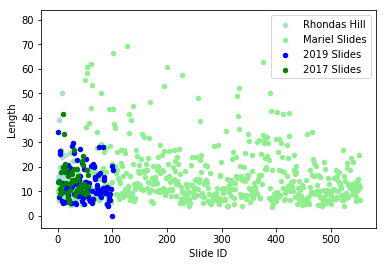

In [4]:
ax = RH.plot(kind='scatter', x ='OBJECTID', y='SHAPE_Length', color='LightBlue', label='Rhondas Hill')

mariel2017.plot(kind='scatter', x ='FID', y='Shape_Leng', color='LightGreen', label='Mariel Slides', ax=ax)
others2019.plot(kind='scatter', x = 'OBJECTID', y='SHAPE_Length', color = 'Blue', label = '2019 Slides', ax=ax)
missed2017.plot(kind='scatter', x = 'OBJECTID', y='SHAPE_Length', color = 'Green', label = '2017 Slides', ax=ax)

ax.set_xlabel("Slide ID")
ax.set_ylabel("Length")


## Slide areas

Most of the landslides are less than 100; however, there are many in 2017 that exceeded this size. 

Text(0, 0.5, 'Area')

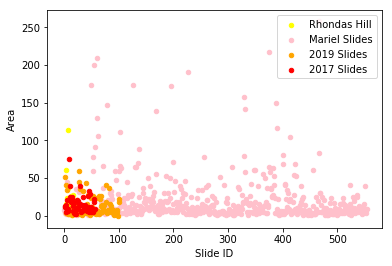

In [12]:
ax = RH.plot(kind='scatter', x ='OBJECTID', y='SHAPE_Area', color='Yellow', label='Rhondas Hill')
mariel2017.plot(kind='scatter', x ='FID', y='Shape_Area', color='Pink', label='Mariel Slides', ax=ax)
others2019.plot(kind='scatter', x = 'OBJECTID', y='SHAPE_Area', color = 'Orange', label = '2019 Slides', ax=ax)
missed2017.plot(kind='scatter', x = 'OBJECTID', y='SHAPE_Area', color = 'Red', label = '2017 Slides', ax=ax)

ax.set_xlabel("Slide ID")
ax.set_ylabel("Area")


## Average slope

Range of 20-50 percent slopes, no correlations

(0, 60)

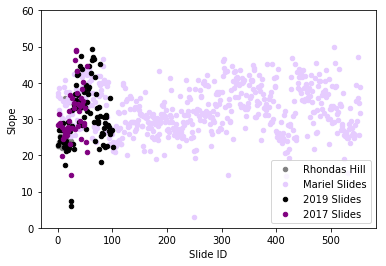

In [13]:
ax = RH.plot(kind='scatter', x ='OBJECTID', y='MEAN', color='Grey', label='Rhondas Hill')
mariel2017.plot(kind='scatter', x ='FID', y='slp_mean', color='#E6CCFF', label='Mariel Slides', ax=ax)
others2019.plot(kind='scatter', x = 'OBJECTID', y='MEAN', color = 'Black', label = '2019 Slides', ax=ax)
missed2017.plot(kind='scatter', x = 'OBJECTID', y='MEAN', color = 'Purple', label = '2017 Slides', ax=ax)

ax.set_xlabel("Slide ID")
ax.set_ylabel("Slope")

# Want to plot without outlier, number 9 in "missed" slides data
ax.set_ylim([0,60])

## Depth of surveyed slides

Most heavily concentrated around 0.5 meters. 

### To do
**would be interesting to add the elevation on the hill

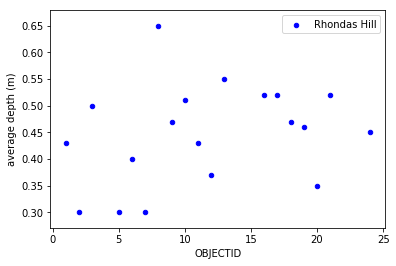

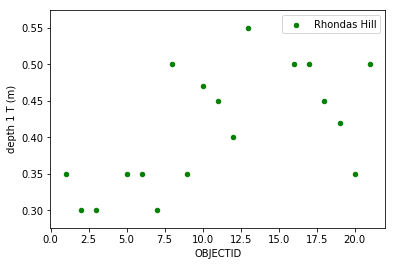

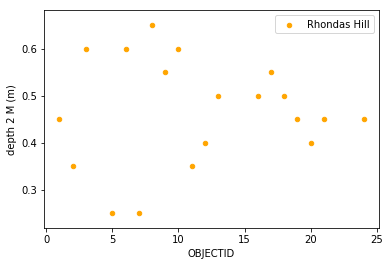

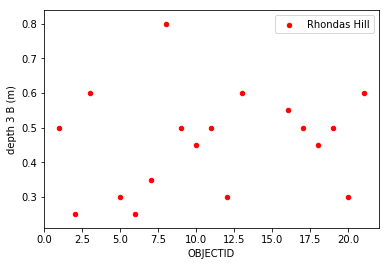

In [7]:
RH = RH[~(RH == 0).any(axis=1)]
RH.plot(kind='scatter', x ='OBJECTID', y='average depth (m)', color='Blue', label='Rhondas Hill')
RH.plot(kind='scatter', x ='OBJECTID', y='depth 1 T (m)', color='Green', label='Rhondas Hill')
RH.plot(kind='scatter', x ='OBJECTID', y='depth 2 M (m)', color='Orange', label='Rhondas Hill')
RH.plot(kind='scatter', x ='OBJECTID', y='depth 3 B (m)', color='Red', label='Rhondas Hill')